In [8]:
from typing import Callable
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

pd.set_option('display.precision', 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(formatter={'all': lambda x: '%.4f' % x})

In [9]:
dataset = pd.read_csv('./data/usa-housing-modified.csv')

dataset['Avg_Area_Income'] = (
    dataset['Avg_Area_Income'] - dataset['Avg_Area_Income'].mean()
) / dataset['Avg_Area_Income'].std()
dataset['Area_Population'] = (
    dataset['Area_Population'] - dataset['Area_Population'].mean()
) / dataset['Area_Population'].std()
dataset['Price'] = (
    dataset['Price'] - dataset['Price'].mean()
) / dataset['Price'].std()

In [14]:
def grad_fn(theta:np.ndarray, x:np.ndarray, y: np.ndarray, debug: bool = False) -> np.ndarray:
    y1 = np.dot(x, theta)
    return np.dot(np.transpose(x), (y1 - y)) * (2 / y.shape[0])

x = dataset[['Avg_Area_Income', 'Area_Population']].to_numpy()
y = dataset[['Price']].to_numpy()

alpha=0.05
error=0.001
inercia=0.9
max_iter=100000
sample_size=128

rows, cols = x.shape
theta = np.ones((cols + 1, 1))
x0 = np.ones(rows)
tmp_x = np.column_stack((x0, x))
current_error = np.Inf
errors = []
p = np.zeros(theta.shape)

found_in_iters = max_iter

for iter in range(max_iter):
    np.random.seed(iter)
    indexes = np.random.permutation(min(max(sample_size, 1), rows))
    smp_x = tmp_x[indexes]
    smp_y = y[indexes]
    grad = grad_fn(theta, smp_x, smp_y)
    p = grad + inercia * p
    theta = theta - alpha * p
    current_error = abs(np.sum(grad_fn(theta, tmp_x, y)))
    errors.append(current_error)
    if current_error <= error:
        found_in_iters = iter + 1
        break


print(theta, error, found_in_iters)

[[-0.0043]
 [0.6601]
 [0.4101]] 0.001 74


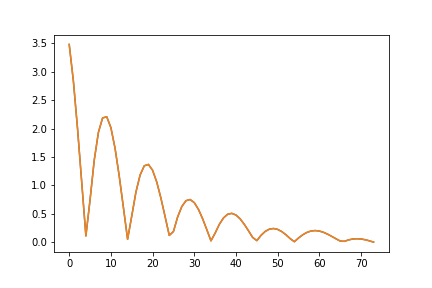

In [19]:
plt.plot(np.arange(found_in_iters), errors)
plt.show()

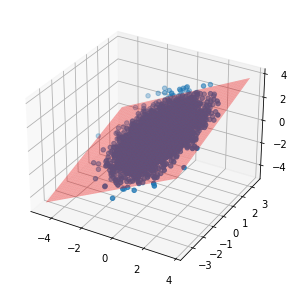

In [16]:
%matplotlib widget

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection="3d")
x1 = np.linspace(x[:,0].min(), x[:,0].max(), 100)
y1 = np.linspace(x[:,1].min(), x[:,1].max(), 100)
X, Y = np.meshgrid(x1, y1)

Xp = np.concatenate(
    [
        np.ones(X.shape).ravel()[:, np.newaxis],
        X.ravel()[:, np.newaxis], 
        Y.ravel()[:, np.newaxis]
    ],
    axis=1
)

Z = np.dot(Xp, theta).reshape((100, 100))

ax.scatter(x[:, 0], x[:, 1], y, c='C0')
ax.plot_surface(X, Y, Z, color='red', alpha=0.35)
fig.tight_layout()
